# Comparison Plots

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.express as px

In [13]:
game_data = pd.read_csv("../data/merged_games_df.csv")

In [14]:
game_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Console,Game Title,Price,Mean,Median
0,ADVENTURES OF TRON,2600,1981,Action,Mattel Interactive,630000.0,30000.0,NaN,10000.0,670000,2600,ADVENTURES OF TRON,16.10,False,False
1,AIRLOCK,2600,1981,Action,Data Age,360000.0,20000.0,NaN,NaN,390000,2600,AIRLOCK,17.00,False,False
2,ALIEN,2600,1981,Action,20th Century Fox Video Games,740000.0,40000.0,NaN,10000.0,790000,2600,ALIEN,61.24,True,True
3,ARMOR AMBUSH,2600,1981,Action,Mattel Interactive,150000.0,10000.0,NaN,NaN,170000,2600,ARMOR AMBUSH,9.92,False,False
4,ASTEROIDS,2600,1980,Shooter,Atari,4000000.0,260000.0,NaN,50000.0,4310000,2600,ASTEROIDS,14.06,False,False


## Games per Year by Platform 

In [15]:
platform_and_year = game_data.groupby(["Platform","Year"], as_index=False).count()
games_by_year = platform_and_year[["Platform", "Year", "Name"]].rename(columns={"Name": "Games per Platform"})
games_by_year

,Platform,Year,Games per Platform
0,2600,1980,5
1,2600,1981,36
2,2600,1982,26
3,2600,1983,8
4,2600,1984,1
5,2600,1985,1
6,2600,1986,2
7,2600,1987,6
8,2600,1988,2
9,2600,1989,1


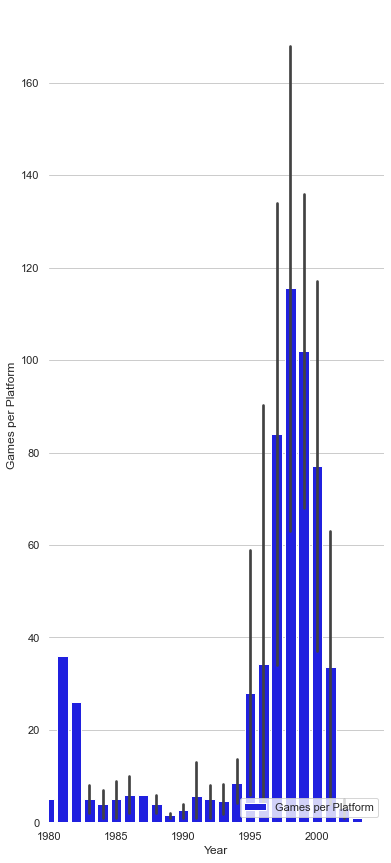

In [31]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the games per year
sns.set_color_codes("pastel")
sns.barplot(x="Year", y="Games per Platform", data=games_by_year,
            label="Games per Platform", color="blue")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="Games per Platform",
       xlabel="Year", xticks=[0,5,10,15,20,25])
sns.despine(left=True, bottom=True)

<AxesSubplot:xlabel='Year', ylabel='Platform'>

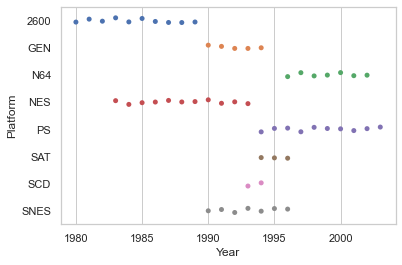

In [17]:
sns.stripplot(data=games_by_year, x="Year", y="Platform")

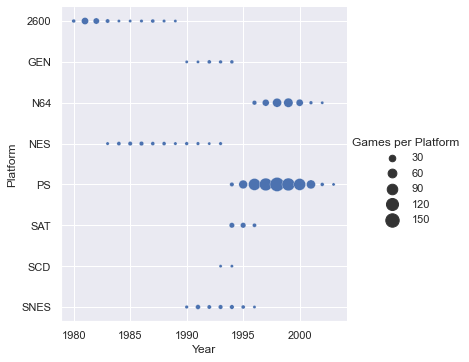

In [28]:
sns.relplot(
    data=games_by_year, x="Year", y="Platform",size="Games per Platform",
    palette=["b", "r"], sizes=(10, 200)
)

## Game Count By Genre

In [19]:
genres = game_data.groupby("Genre", as_index=False).count()
genre_count = genres[["Genre", "Name"]].rename(columns={"Name": "Game Count"})
genre_count

,Genre,Game Count
0,Action,200
1,Adventure,38
2,Fighting,124
3,Misc,49
4,Platform,107
5,Puzzle,51
6,Racing,183
7,Role-Playing,62
8,Shooter,132
9,Simulation,49


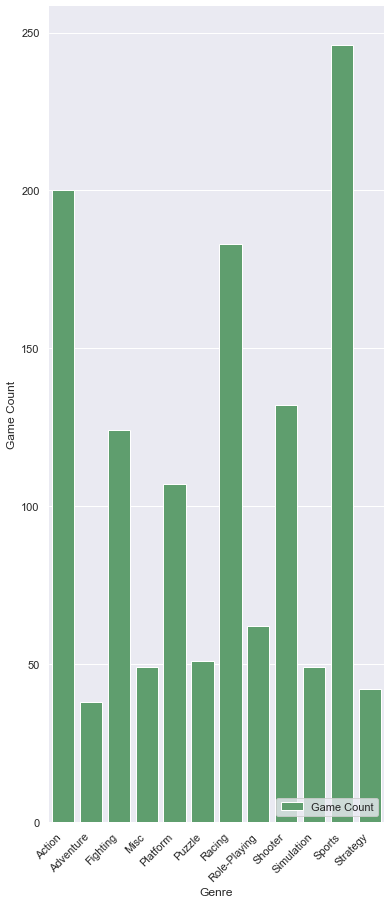

In [20]:
sns.set_theme(style="darkgrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the games per year
sns.barplot(x="Genre", y="Game Count", data=genre_count,
            label="Game Count", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Game Count", xlabel="Genre")
plt.xticks(rotation=45, ha='right')
sns.despine(left=True, bottom=True)

In [34]:
genre_year = game_data.groupby(["Genre", "Year"], as_index=False).count()
genre_by_year = genre_year[["Genre", "Year", "Platform"]].rename(columns={"Platform": "Games per Genre"})
genre_by_year

,Genre,Year,Games per Genre
0,Action,1981,20
1,Action,1982,10
2,Action,1983,5
3,Action,1984,1
4,Action,1985,1
...,...,...,...
178,Strategy,1997,5
179,Strategy,1998,10
180,Strategy,1999,13
181,Strategy,2000,1


<AxesSubplot:xlabel='Year', ylabel='Genre'>

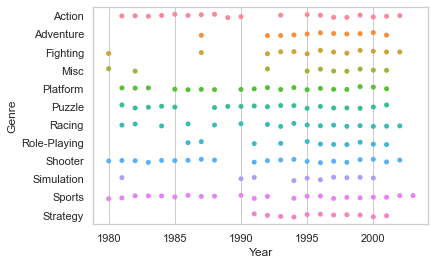

In [35]:
sns.stripplot(data=genre_by_year, x="Year", y="Genre")

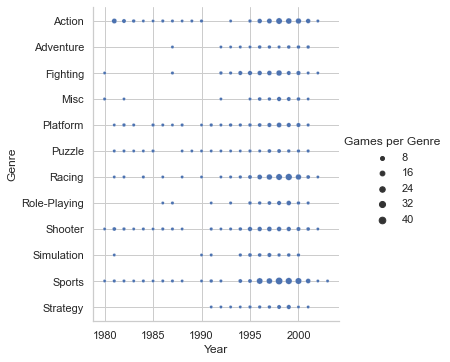

In [36]:
sns.relplot(
    data=genre_by_year, x="Year", y="Genre",size="Games per Genre",
    palette=["b", "r"], sizes=(10, 50)
)

## Animated Bubble Chart

In [39]:
genre_platform = games_by_year.merge(genre_by_year, how='inner', on="Year")
genre_platform

,Platform,Year,Games per Platform,Genre,Games per Genre
0,2600,1980,5,Fighting,1
1,2600,1980,5,Misc,2
2,2600,1980,5,Shooter,1
3,2600,1980,5,Sports,1
4,2600,1981,36,Action,20
...,...,...,...,...,...
445,SNES,1995,6,Shooter,15
446,SNES,1995,6,Simulation,8
447,SNES,1995,6,Sports,9
448,SNES,1995,6,Strategy,4


In [40]:
from bubbly.bubbly import bubbleplot

In [41]:
figure = px.scatter(genre_platform, x = "Games per Genre", y = "Games per Platform", 
                    animation_frame= "Year", animation_group = "Genre",
                    hover_name="Genre", color = "Platform",
                    size = "Games per Platform",
                    range_x=[1,60], range_y=[1,200])

figure.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
figure.show()

In [30]:
# Site where the bubble animation came from
# https://medium.com/python-in-plain-english/animated-bubble-chart-with-plotly-in-python-inspired-by-professor-hans-rosling-b7262298dd03